<h1>Task 1: Prediction using Supervised ML</h1>

<h2>Author: Ananya Sharma</h2>

<h2>Data Science and Business Analytics</h2>

Dataset: http://bit.ly/w-data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\Lenovo\Downloads\student_scores - student_scores.csv')

<h3>Exploring Data</h3>

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
df.duplicated().sum()

0

<h3>Visualizing Data</h3>

Text(0.5, 1.0, 'Hours vs Scores')

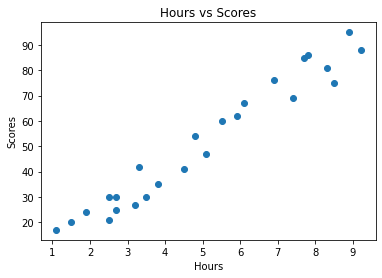

In [9]:
plt.scatter(df.Hours,df.Scores)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")

In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


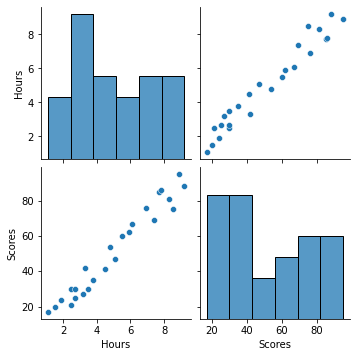

In [11]:
sns.pairplot(df)

<AxesSubplot:>

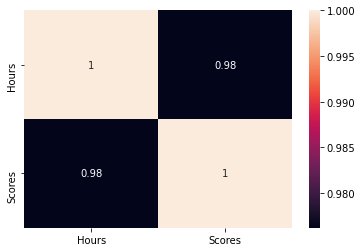

In [12]:
sns.heatmap(df.corr(), annot=True)

<h3>Analyzing Data</h3>

In [13]:
x=df.drop('Scores',axis=1)
y=df['Scores']

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [16]:
x_train.shape

(17, 1)

In [17]:
y_test.shape

(8,)

In [18]:
l_reg=LinearRegression()
l_reg.fit(x_train,y_train)
y_predict=l_reg.predict(x_test)

In [19]:
print('Coefficient ->', l_reg.coef_)
print('Intercept ->', l_reg.intercept_)

Coefficient -> [9.78856669]
Intercept -> 2.370815382341881


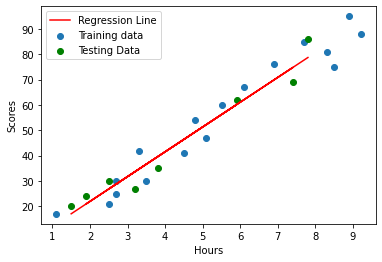

In [20]:
plt.plot(x_test,l_reg.predict(x_test),color='red')
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test,color='Green')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend(['Regression Line','Training data','Testing Data'])

In [21]:
predicted_data = pd.DataFrame({'Actual Score ': y_test, 'Predicted Score': y_predict})
predicted_data

,Actual Score,Predicted Score
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


Text(0, 0.5, 'Score')

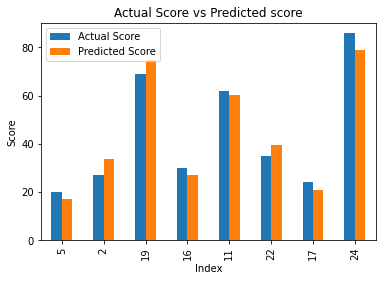

In [22]:
predicted_data.plot(kind='bar')
plt.title('Actual Score vs Predicted score')
plt.xlabel('Index')
plt.ylabel('Score')

In [23]:
hour = eval(input('Enter hours:'))
pred_score = l_reg.predict([[hour]])
print(pred_score)

Enter hours:9.25
[92.91505723]


<h3>Model Evaluation</h3>

In [24]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predict))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_predict))
print('R2-Score:',metrics.r2_score(y_test,y_predict))

Mean Absolute Error: 4.419727808027652
Mean Squared Error: 22.96509721270043
R2-Score: 0.9568211104435257
